<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Акопян Изабелла Арменовна
##### Группа:   НБИбд-01-20

## Москва 2023
***

### Вариант №12

#### __Текст задания__:
В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.

2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества  R2  двух подходов.

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:

линейной регрессии
гребневой регрессии (L2)
лассо регрессии (L1)
7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.


------------------------
Лабораторная работа 1 – Вариант 12 

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/fixed acidity 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

Решение ниже


__Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные.__

In [1]:
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load("wine_quality", split='train') 

ds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteRJEH2L/wine_quality-train.tfrecord*...:…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [3]:
df = tfds.as_dataframe(ds)
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [4]:
#df.drop(columns=['quality'],inplace=True) #оценка качества может быть от 0 до 10 всего
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


__Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.__

In [5]:
corr_matrix = df.corr()
corr_matrix

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
features/alcohol,1.000000,-0.360189,-0.075729,-0.780138,-0.120881,-0.250104,0.121432,-0.450631,-0.017433,-0.448892,0.067718,0.435575
features/chlorides,-0.360189,1.000000,0.114364,0.257211,0.023086,0.101392,-0.090439,0.088685,0.016763,0.198910,0.070512,-0.209934
features/citric acid,-0.075729,0.114364,1.000000,0.149503,0.289181,0.094077,-0.163748,0.094212,0.062331,0.121131,-0.149472,-0.009209
features/density,-0.780138,0.257211,0.149503,1.000000,0.265331,0.294210,-0.093592,0.838967,0.074493,0.529881,0.027114,-0.307123
features/fixed acidity,-0.120881,0.023086,0.289181,0.265331,1.000000,-0.049396,-0.425858,0.089021,-0.017143,0.091070,-0.022697,-0.113663
features/free sulfur dioxide,-0.250104,0.101392,0.094077,0.294210,-0.049396,1.000000,-0.000618,0.299098,0.059217,0.615501,-0.097012,0.008158
features/pH,0.121432,-0.090439,-0.163748,-0.093592,-0.425858,-0.000618,1.000000,-0.194133,0.155951,0.002321,-0.031915,0.099427
features/residual sugar,-0.450631,0.088685,0.094212,0.838967,0.089021,0.299098,-0.194133,1.000000,-0.026664,0.401439,0.064286,-0.097577
features/sulphates,-0.017433,0.016763,0.062331,0.074493,-0.017143,0.059217,0.155951,-0.026664,1.000000,0.134562,-0.035728,0.053678
features/total sulfur dioxide,-0.448892,0.198910,0.121131,0.529881,0.091070,0.615501,0.002321,0.401439,0.134562,1.000000,0.089261,-0.174737


In [6]:
import seaborn as sns

<Axes: >

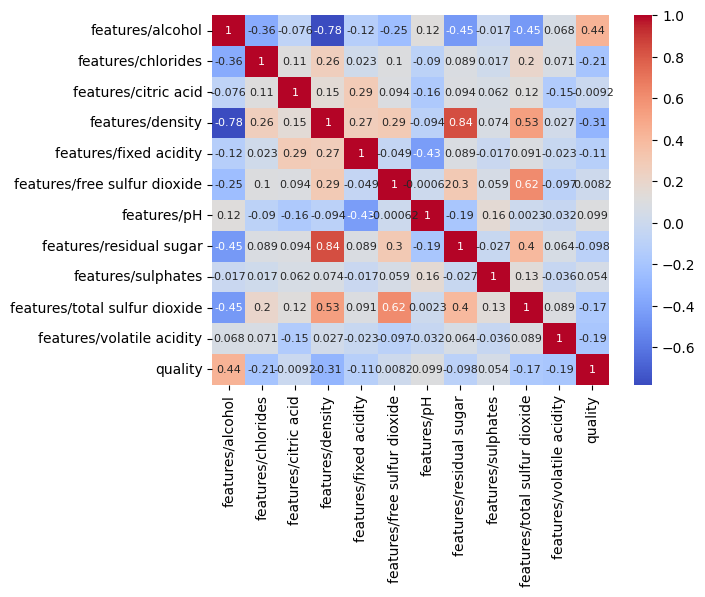

In [7]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':8}) #для визуализации, так проще


Видим, тут плотность зависит от спирта (чем больше спирта, тем меньше плотность (-0.78)) - по чеддоку корреляция высокая

А диоксид серы (sulfur acidity) можно считать не зависит от меры кислотности (pH) - по Чеддоку вообще нет корреляции

__Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.__

In [8]:
import matplotlib.pyplot as plt

y = features/fixed acidity 

x = features/density 

Визуализация для независимой переменной – эмпирическая плотность распределения 

Визуализация для зависимой переменной – столбчатая диаграмма 

__Эмпирическая (выборочная) плотность распределения (PDF) для x__

# __границы х отредачить*__:

In [115]:
y = df['features/fixed acidity']
x = df['features/density']

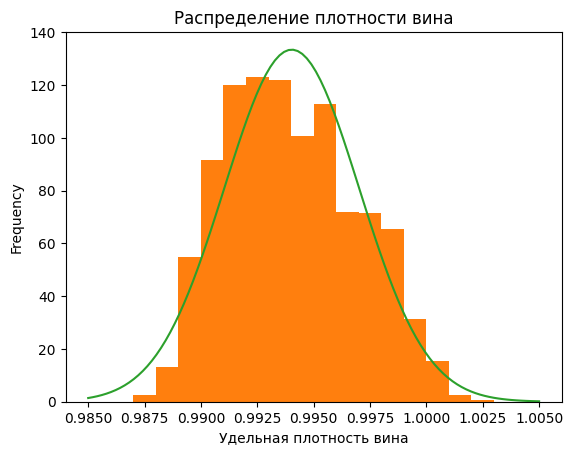

In [149]:
x.plot.hist(density=True, range=[0.985, 1.005], bins = 20).set_xlabel('Удельная плотность вина')
counts, bins, _ = plt.hist(x, density=True, range=[0.985, 1.005], bins=20)
mu = np.mean(x)
sigma = np.std(x)
x_line = np.linspace(bins[0], bins[-1], 100)
y_line = (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-((x_line-mu)**2)/(2*sigma**2))

plt.title('Распределение плотности вина')
plt.plot(x_line, y_line) 

__Столбчатая диаграмма для y__

[Text(0, 0.5, 'Фиксированная кислотность вина'), Text(0.5, 0, 'Индекс вина')]

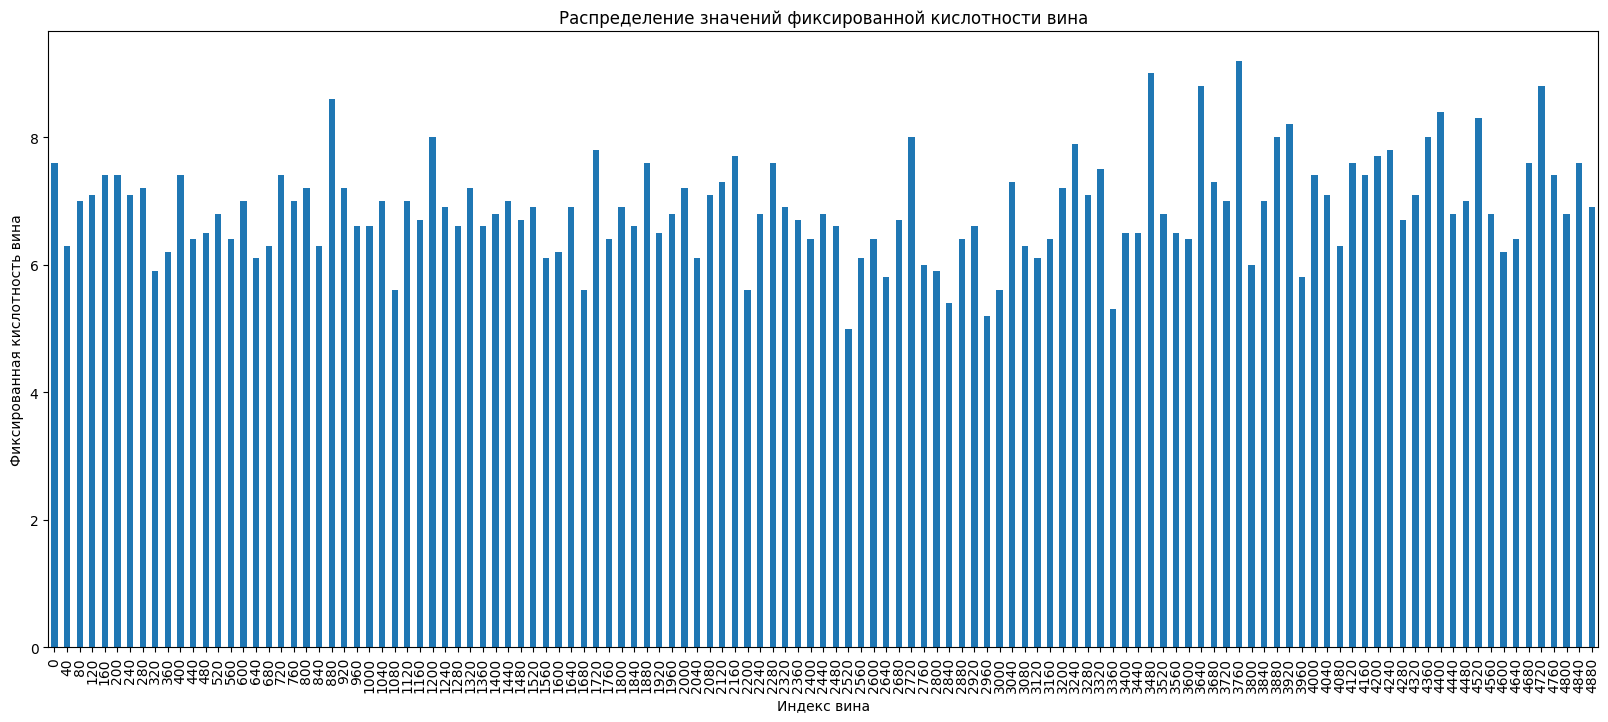

In [156]:
df[::40]['features/fixed acidity'].plot.bar(title='Распределение значений фиксированной кислотности вина', figsize=(20,8)).set(ylabel='Фиксированная кислотность вина', xlabel = 'Индекс вина')

__Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества R2 двух подходов.__

__Показатель качества регрессии – R^2 (коэффициент детерминации)__

In [13]:
import numpy as np
import pandas as pd

In [14]:
!pip install Sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=78111f199783d407470bbcaa1f5741037e5109c8aaf910702f82097f693a7157
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built Sklearn


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
ds = tfds.load("wine_quality") 

x_train,x_test,y_train,y_test = train_test_split(x, y,  test_size=0.20, random_state=42)
x_train,x_test,y_train,y_test

(4665    0.99440
 1943    0.99018
 3399    0.99541
 843     1.00030
 2580    0.99620
          ...   
 4426    0.99530
 466     0.99370
 3092    0.99032
 3772    0.99060
 860     0.99264
 Name: features/density, Length: 3918, dtype: float32,
 4656    0.99556
 3659    0.99360
 907     0.99990
 4352    0.99538
 3271    0.99026
          ...   
 3207    0.99060
 1539    0.99605
 964     0.99200
 168     0.99454
 3661    0.99139
 Name: features/density, Length: 980, dtype: float32,
 4665    7.0
 1943    6.3
 3399    7.8
 843     8.0
 2580    6.5
        ... 
 4426    6.0
 466     6.7
 3092    6.2
 3772    5.6
 860     6.7
 Name: features/fixed acidity, Length: 3918, dtype: float32,
 4656    6.8
 3659    6.6
 907     8.0
 4352    6.4
 3271    7.5
        ... 
 3207    8.2
 1539    7.5
 964     6.4
 168     6.2
 3661    6.9
 Name: features/fixed acidity, Length: 980, dtype: float32)

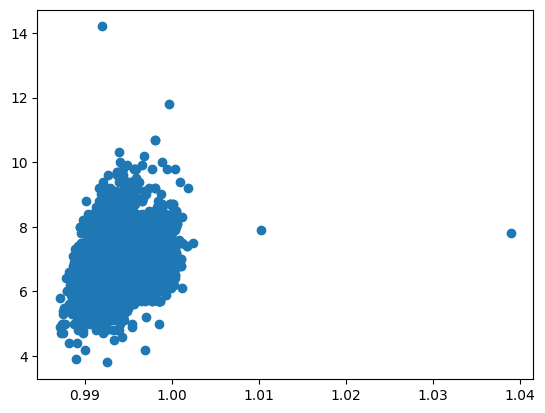

In [38]:

plt.scatter(x, y)
plt.xlabel= '343'
plt.ylabel = 'df'
plt.show()

In [18]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [19]:
#коэффициент регрессии
a = (x - x_mean).dot(y - y_mean) / (x - x_mean).dot(x - x_mean)
#коэффициент смещения
b = y_mean - a * x_mean
a,b

(74.861694, -67.559784)

In [20]:
y_hat = a * x + b
y_hat

0       7.361801
1       6.635643
2       6.610191
3       7.056366
4       6.565269
          ...   
4893    6.596718
4894    6.909630
4895    7.216568
4896    7.522751
4897    6.593719
Name: features/density, Length: 4898, dtype: float32

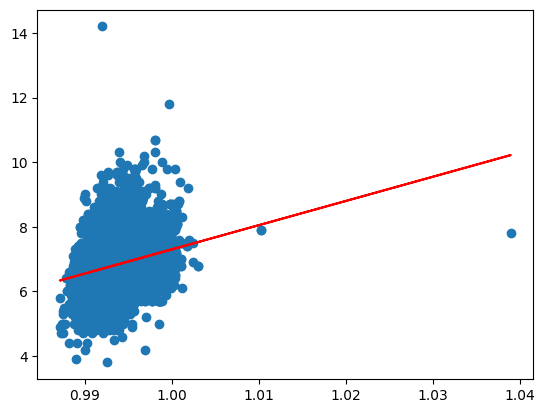

In [21]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')


In [22]:
x_predict = 1.005
y_predict = a * x_predict + b
y_predict

7.676218872070308

In [23]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [24]:
reg1 = SimpleLinReg()
reg1

SimpleLinearReg()

In [25]:
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))

array([7.67621887])

In [26]:
reg1.a_, reg1.b_

(74.861694, -67.559784)

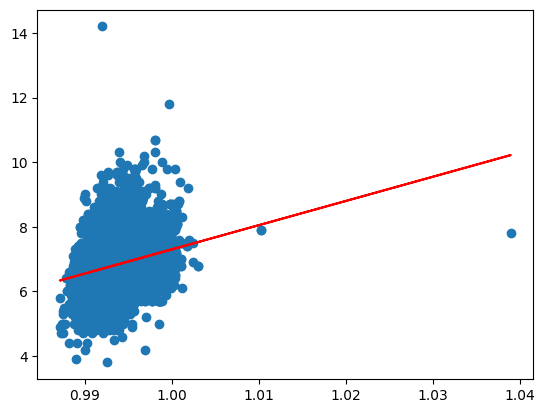

In [27]:
y_hat1 = reg1.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')


In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3918,), (3918,), (980,), (980,))

In [29]:
df_train = pd.DataFrame(x_train)
df_train

,features/density
4665,0.99440
1943,0.99018
3399,0.99541
843,1.00030
2580,0.99620
...,...
4426,0.99530
466,0.99370
3092,0.99032
3772,0.99060


In [73]:
x = x_train
y = y_train
x.shape, y.shape


((3918,), (3918,))

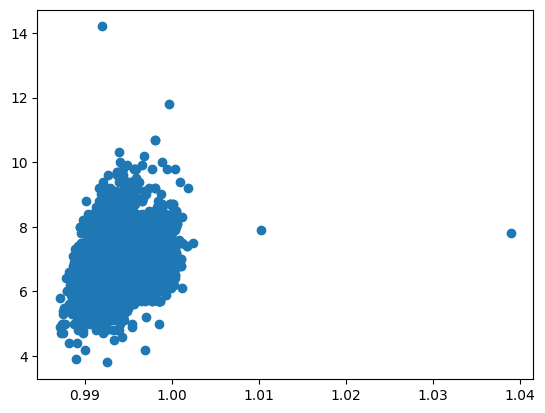

In [74]:
plt.scatter(x, y);
#набор переменных для парной регрессии

In [75]:
reg = SimpleLinReg()
reg.fit(x, y)

SimpleLinearReg()

In [76]:
reg.a_, reg.b_

(74.026276, -66.73799)

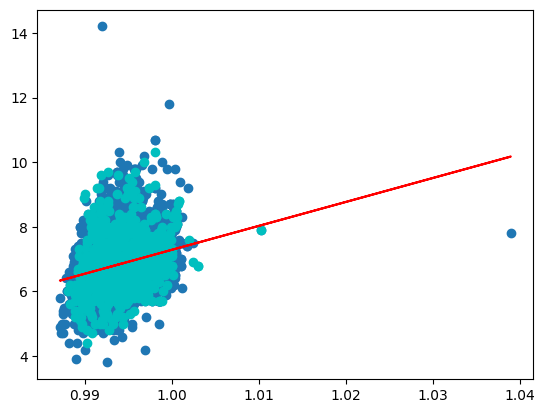

In [77]:
plt.scatter(x, y)
plt.scatter(x_test, y_test, color="c")
plt.plot(x, reg.predict(x), color='r');

In [79]:
x = x[x < 1.03]
y = y[y< 13]


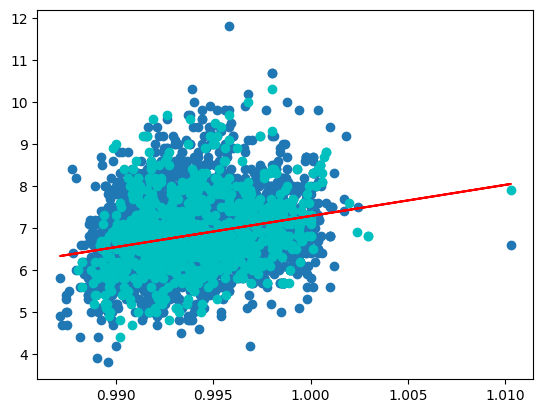

In [80]:
plt.scatter(x, y)
plt.scatter(x_test, y_test, color="c")
plt.plot(x, reg.predict(x), color='r');

In [81]:
y_predict = reg.predict(x_test)
y_predict

array([6.95960693, 6.81451694, 7.28088045, 6.94628175, 6.56726875,
       6.46140861, 6.9773753 , 6.87373897, 6.63685087, 6.6768264 ,
       7.22166284, 6.8515274 , 6.94036043, 7.12542594, 7.13430792,
       6.97589276, 6.4532679 , 6.95516814, 6.62945143, 6.5258151 ,
       6.50508606, 6.88854227, 6.98033596, 6.63389021, 6.91815328,
       6.80711309, 6.61390686, 6.70643741, 7.11062265, 6.56874687,
       6.74789106, 6.54802225, 6.50286667, 6.49916474, 6.72198198,
       6.80489369, 6.65165859, 6.93295658, 6.75529492, 7.02327215,
       6.79970923, 6.92629399, 7.18464797, 6.96256759, 6.65165859,
       6.84560608, 6.83968476, 6.75677746, 6.71976259, 6.65461925,
       6.77750208, 6.7686201 , 6.70051609, 6.96256759, 6.57615073,
       6.82932024, 6.61464372, 6.84412795, 7.21425898, 7.09581493,
       6.80341116, 6.53321454, 7.11062265, 7.09581493, 7.02178961,
       6.8515274 , 7.1328298 , 7.02919347, 6.54357906, 6.70125736,
       6.73308776, 6.92555713, 6.77306329, 6.6812696 , 7.15503

In [90]:
def check_R2(y_predict):
  mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
  return f'R^2 точного подхода : {1 - mse_test/np.var(y_test)}'


при помощи нейронной сети:

In [32]:
import tensorflow as tf

In [33]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)
#R2

In [87]:
model.fit(x, y, epochs=100) # verbose=0  процесс обучения будет скрыт и не будет отображаться в выводе

Epoch 1/100
123/123 [==============================] - 1s 2ms/step - loss: 0.6650 - mean_absolute_error: 0.6650
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6480 - mean_absolute_error: 0.6480
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6566 - mean_absolute_error: 0.6566
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6584 - mean_absolute_error: 0.6584
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6507 - mean_absolute_error: 0.6507
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6479 - mean_absolute_error: 0.6479
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6471 - mean_absolute_error: 0.6471
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6639 - mean_absolute_error: 0.6639
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6519 - mean_absolute_error:

Выполним прогнозирование значений зависимой переменной (отклика)

In [88]:
y_predict2 = model.predict(x_test)
y_predict2[:5]

31/31 [==============================] - 0s 1ms/step


array([[7.0435467],
       [7.0231085],
       [7.0888033],
       [7.04167  ],
       [6.9882803]], dtype=float32)

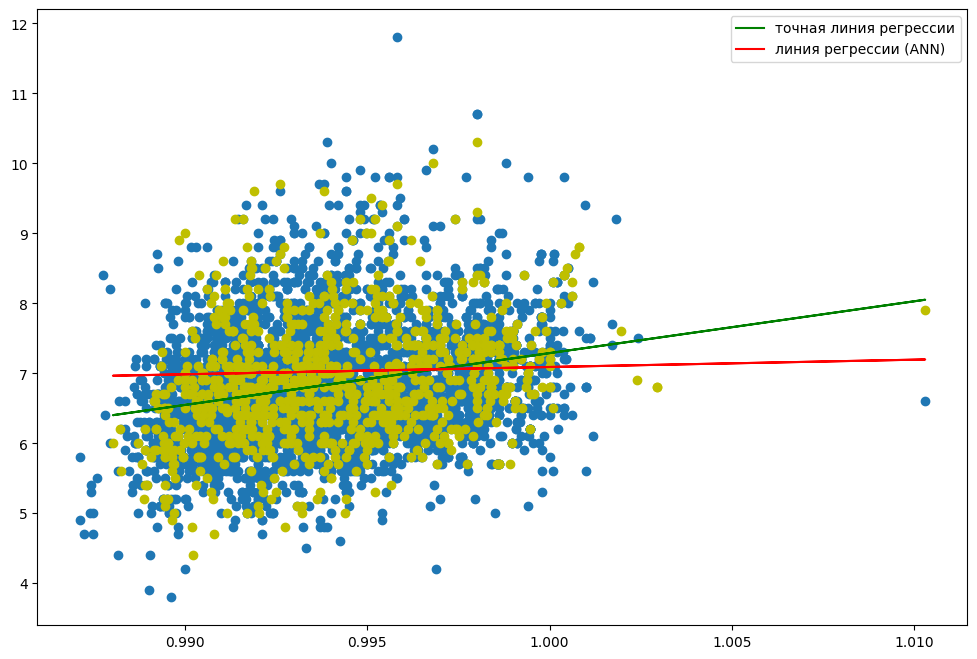

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.scatter(x_test, y_test, c='y')
plt.plot(x_test, y_predict, c='g', label='точная линия регрессии')
plt.plot(x_test, y_predict2, c='r', label='линия регрессии (ANN)')
plt.legend();

1 - mse_test/np.var(y_test)
коэффициент детерминации, по нему сравню модели

In [91]:
check_R2(y_predict)

'R^2 точного подхода : 0.07154566177183763'

In [98]:
check_R2(y_predict2)

ValueError: ignored